In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
#REading the csv file
df=pd.read_csv('/content/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [34]:
df.shape

(614, 13)

In [35]:
#cHecking for null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
#column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
df = df.drop(columns=['Loan_ID'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [38]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column)
        print('Number of unique data:', df[column].nunique())
        print("Value Counts")
        print(df[column].value_counts())
        print("****************************************************************************************************")

Gender
Number of unique data: 2
Value Counts
Male      489
Female    112
Name: Gender, dtype: int64
****************************************************************************************************
Married
Number of unique data: 2
Value Counts
Yes    398
No     213
Name: Married, dtype: int64
****************************************************************************************************
Dependents
Number of unique data: 4
Value Counts
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************************************************************************************
Education
Number of unique data: 2
Value Counts
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************************************************************************************
Self_Employed
Number of unique data: 2
Value Counts
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************************************

In [39]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
# Fill missing values in categorical columns with the most frequent value
for column in df.select_dtypes(include='object'):
    df[column] = df[column].fillna(df[column].mode()[0])

# Fill missing values in numerical columns with the mean
for column in df.select_dtypes(include='number'):
    df[column] = df[column].fillna(df[column].mode())

In [41]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360)
df['Credit_History']=df['Credit_History'].fillna(1)
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

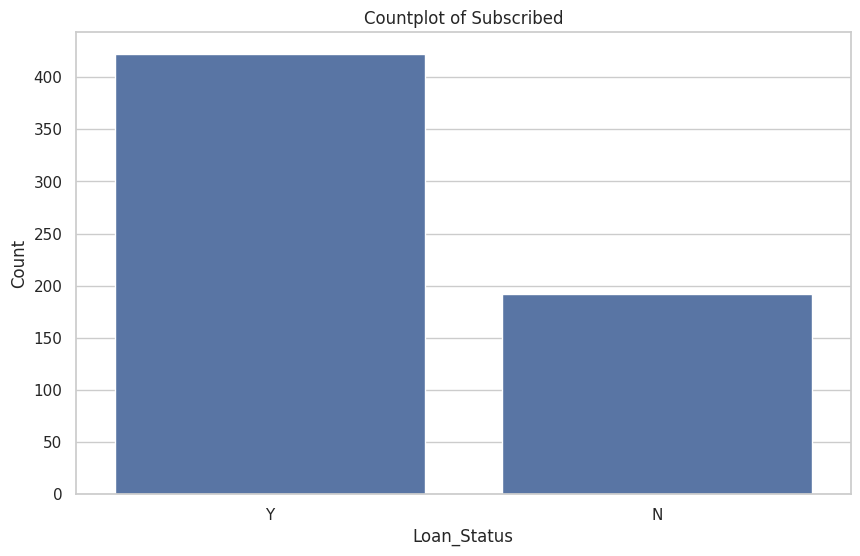

In [51]:
#COunt plot of column 'Loan_Status'
sns.set(style="whitegrid")

fig = plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=df)
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Countplot of Subscribed')

plt.show()

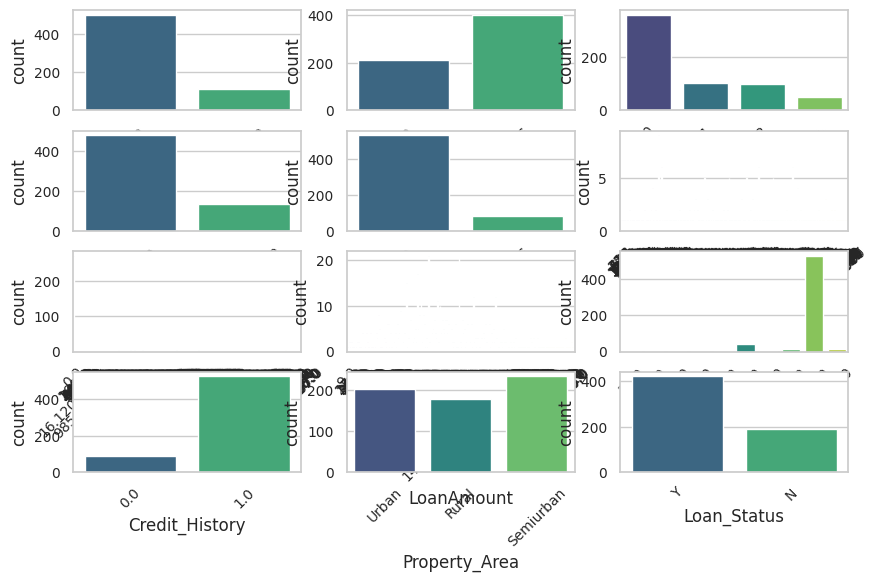

In [52]:
#count plot of existing columns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6), facecolor='white')
plotnumber = 1

for i in df.columns:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=i, data=df, palette="viridis")
        plt.xlabel(i)
        plt.xticks(rotation=45, fontsize=10)  # Adjust rotation and fontsize as needed
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

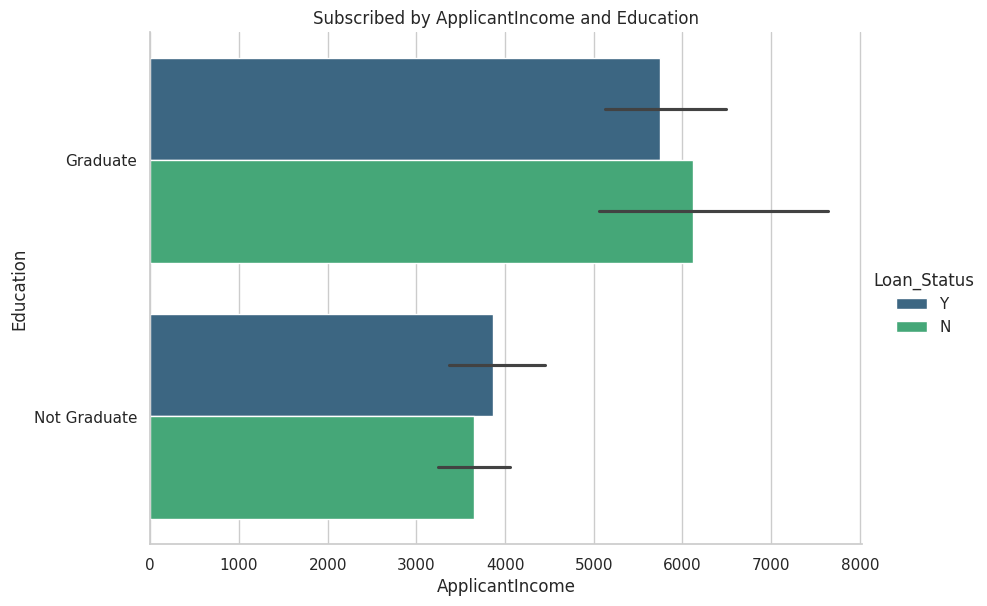

In [53]:
# Creating a categorical plot with job on x-axis, education on y-axis, and hue as subscribed
sns.catplot(x='ApplicantIncome', y='Education', hue='Loan_Status', data=df, kind='bar', palette='viridis', height=6, aspect=1.5)

# Set labels and title
plt.xlabel('ApplicantIncome')
plt.ylabel('Education')
plt.title('Subscribed by ApplicantIncome and Education')

# Show the plot
plt.show()

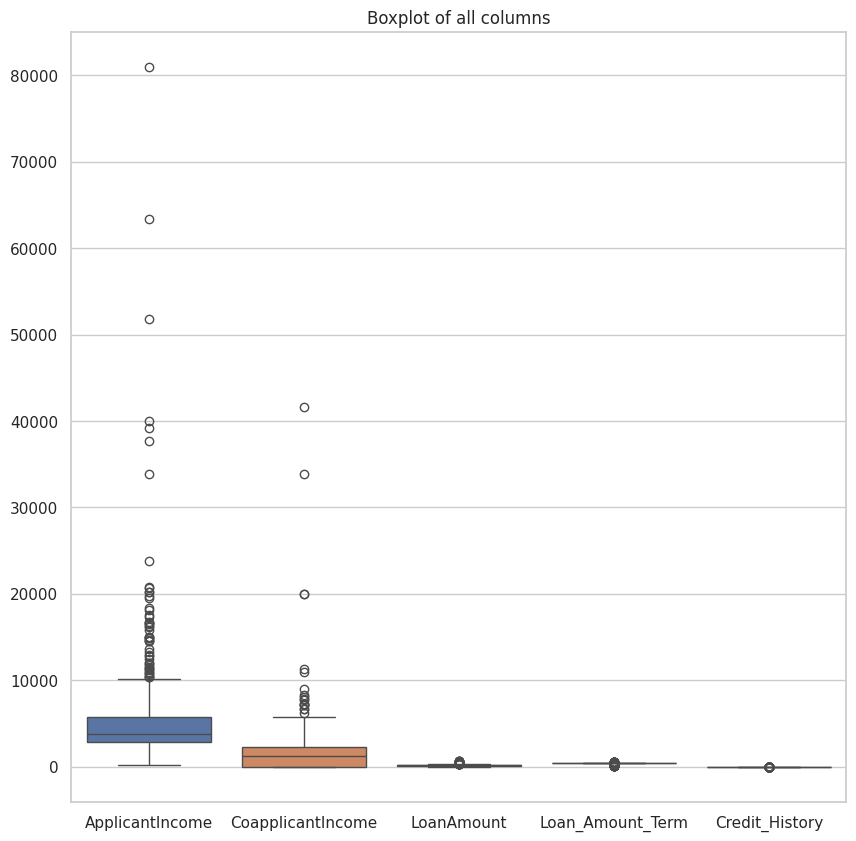

In [54]:
#Box plot of all columns
plt.figure(figsize=(10, 10))
sns.boxplot(data=df)
plt.title('Boxplot of all columns')
plt.show()

In [56]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [58]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.367622,342.410423,0.855049,0.687296
std,6109.041673,2926.248369,84.044227,64.428629,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,128.500000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


#Label Encoder

In [59]:
#changing cat val to digits
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

In [60]:
#Removing Outliers Using IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df1 = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(207, 12)

<Axes: >

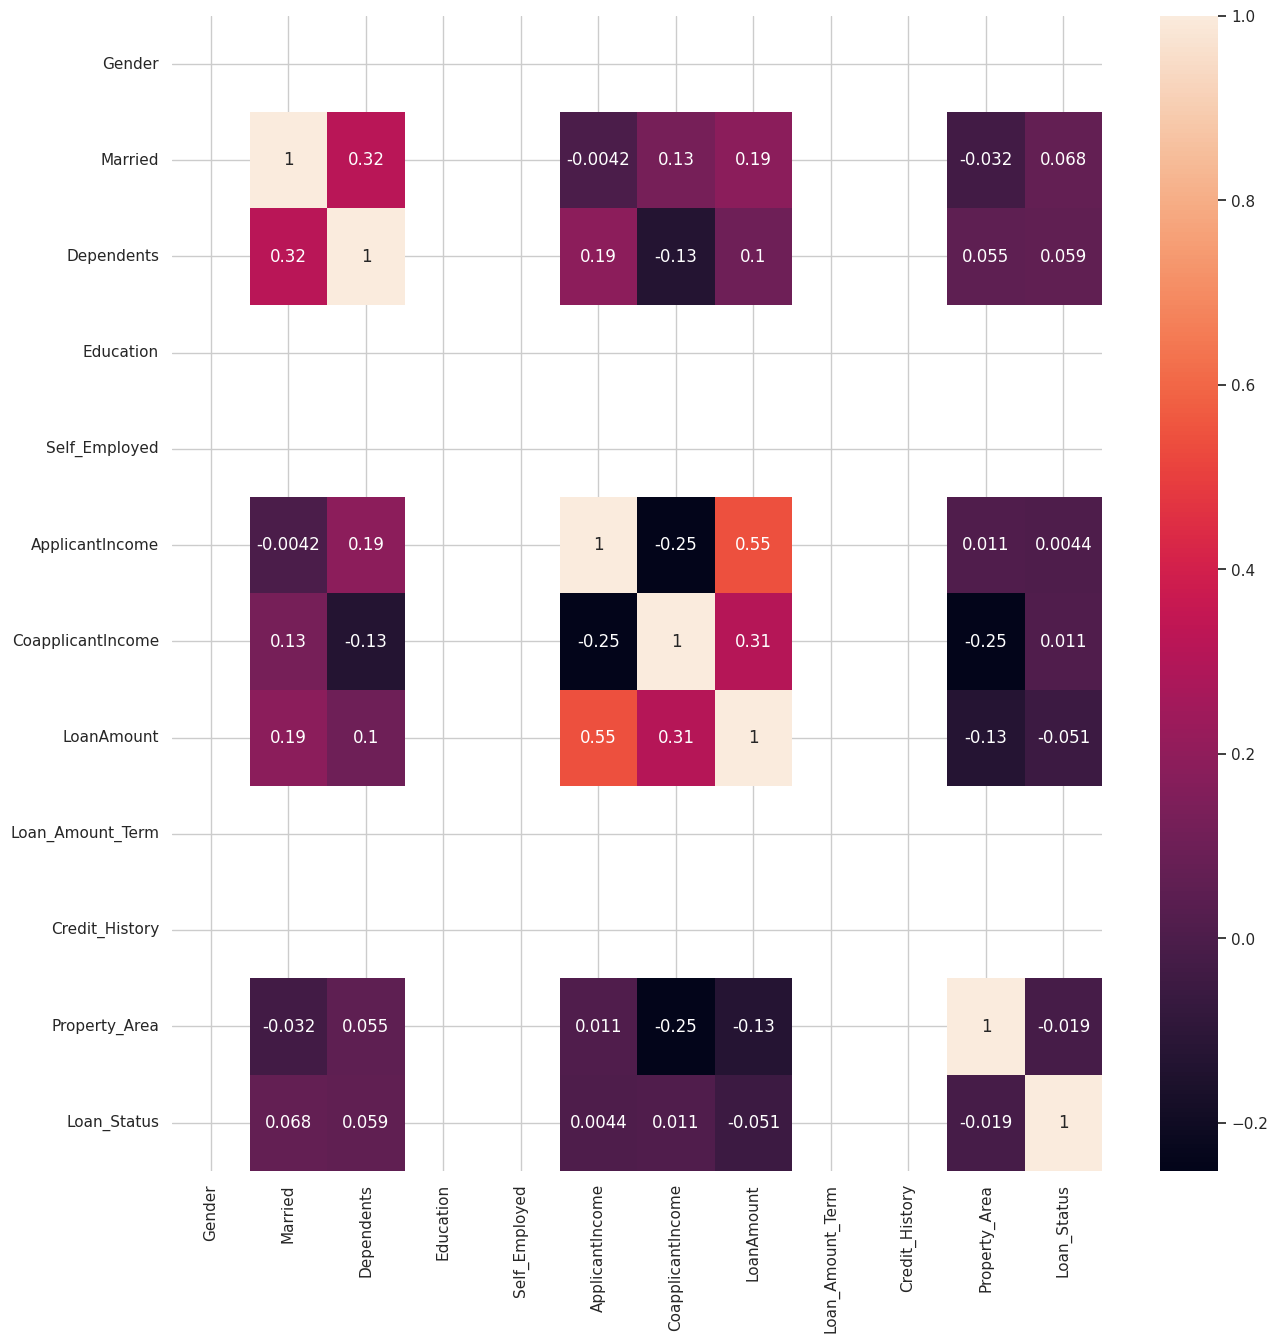

In [62]:
#Heatmap for correlation
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(),annot=True)

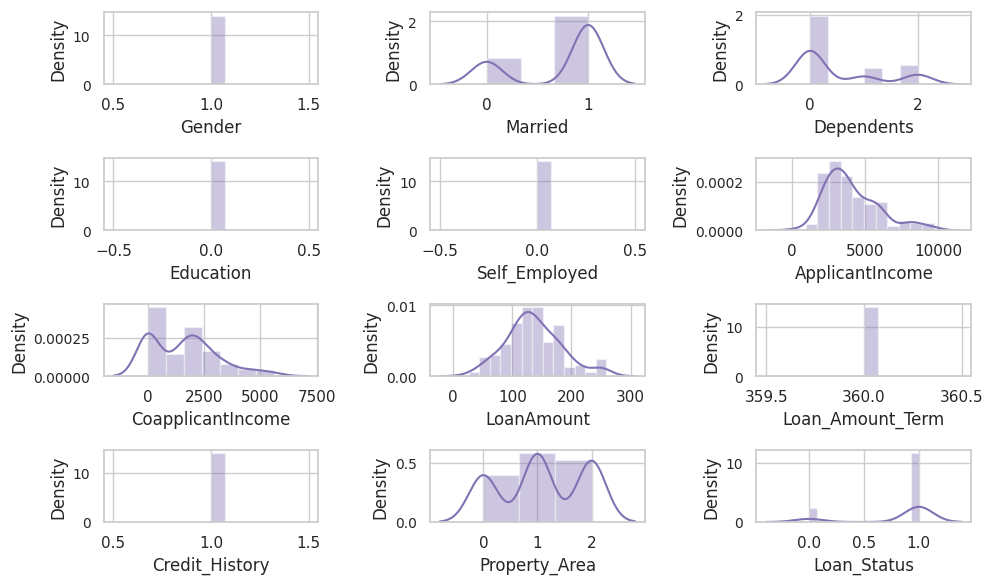

In [63]:
#Distribution plot
plt.figure(figsize=(10, 6),facecolor='white')
plotnumber = 1

for i in df1:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df1[i], color='m')  # Use histplot instead of displot for individual axes
        plt.xlabel(i)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [64]:
#Selecting feature and target variable
x=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [65]:
#Standadizing datavalues
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [66]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,-1.622214,-0.671731,0.0,0.0,0.968191,-1.097931,-0.343203,0.0,0.0,1.178330
1,0.0,0.616441,0.592345,0.0,0.0,0.279023,-0.071333,-0.173425,0.0,0.0,-1.389189
2,0.0,-1.622214,-0.671731,0.0,0.0,1.050390,-1.097931,0.102464,0.0,0.0,1.178330
3,0.0,0.616441,1.856421,0.0,0.0,-0.035076,-0.059079,0.675465,0.0,0.0,1.178330
4,0.0,0.616441,1.856421,0.0,0.0,-0.473835,-0.621394,-1.404317,0.0,0.0,1.178330
...,...,...,...,...,...,...,...,...,...,...,...
202,0.0,-1.622214,-0.671731,0.0,0.0,-0.214717,1.830052,0.760354,0.0,0.0,-1.389189
203,0.0,0.616441,0.592345,0.0,0.0,-0.364962,0.603989,0.781577,0.0,0.0,-0.105430
204,0.0,0.616441,-0.671731,0.0,0.0,-0.456416,0.229566,-0.597870,0.0,0.0,-1.389189
205,0.0,0.616441,0.592345,0.0,0.0,2.178317,-0.934547,2.479358,0.0,0.0,1.178330


In [67]:
x.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
x.skew()

Gender               0.000000
Married             -1.013129
Dependents           1.045966
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.987666
CoapplicantIncome    0.624964
LoanAmount           0.375433
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area       -0.144760
dtype: float64

In [69]:
x['Dependents']=np.log1p(x['Dependents'])
x['ApplicantIncome']=np.log1p(x['ApplicantIncome'])
x['Married']=np.cbrt(x['Married'])
x.skew()

Gender               0.000000
Married             -1.013129
Dependents           0.771473
Education            0.000000
Self_Employed        0.000000
ApplicantIncome     -0.791322
CoapplicantIncome    0.624964
LoanAmount           0.375433
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area       -0.144760
dtype: float64

In [71]:
x.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome      24
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [73]:
x['ApplicantIncome']=x['ApplicantIncome'].fillna(x['ApplicantIncome'].mean())

In [74]:
x.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [75]:
#checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF Factor,Features
0,NaN,Gender
1,1.122546,Married
2,1.160877,Dependents
3,NaN,Education
4,NaN,Self_Employed
5,1.524146,ApplicantIncome
6,1.316463,CoapplicantIncome
7,1.509181,LoanAmount
8,NaN,Loan_Amount_Term
9,NaN,Credit_History


#Oversampling

In [76]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [77]:
y1.value_counts()

1    172
0    172
Name: Loan_Status, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.9230769230769231 random_state is 90


In [79]:
#Spliting dtaset to train and test
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=maxRs)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [84]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.5865384615384616
[[31 23]
 [20 30]]
              precision    recall  f1-score   support

           0       0.61      0.57      0.59        54
           1       0.57      0.60      0.58        50

    accuracy                           0.59       104
   macro avg       0.59      0.59      0.59       104
weighted avg       0.59      0.59      0.59       104



In [85]:
# RandomForestClassification
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.8942307692307693
[[50  4]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        54
           1       0.91      0.86      0.89        50

    accuracy                           0.89       104
   macro avg       0.90      0.89      0.89       104
weighted avg       0.90      0.89      0.89       104



In [86]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.6923076923076923
[[48  6]
 [26 24]]
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        54
           1       0.80      0.48      0.60        50

    accuracy                           0.69       104
   macro avg       0.72      0.68      0.68       104
weighted avg       0.72      0.69      0.68       104



In [87]:
#using GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.9038461538461539
[[48  6]
 [ 4 46]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        54
           1       0.88      0.92      0.90        50

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



In [88]:
# Using AdaBoost Classifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.7884615384615384
[[43 11]
 [11 39]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        54
           1       0.78      0.78      0.78        50

    accuracy                           0.79       104
   macro avg       0.79      0.79      0.79       104
weighted avg       0.79      0.79      0.79       104



In [89]:
#Using Bagging Classifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8653846153846154
[[50  4]
 [10 40]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        54
           1       0.91      0.80      0.85        50

    accuracy                           0.87       104
   macro avg       0.87      0.86      0.86       104
weighted avg       0.87      0.87      0.86       104



In [90]:
#Using Extra Tree Classifier
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.7788461538461539
[[48  6]
 [17 33]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        54
           1       0.85      0.66      0.74        50

    accuracy                           0.78       104
   macro avg       0.79      0.77      0.77       104
weighted avg       0.79      0.78      0.78       104



In [91]:
#Using KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

# Make predictions
pred_knn = knn.predict(x_test)

# Print evaluation metrics
print("\nK-Nearest Neighbors (KNN):")
print(f"Accuracy: {accuracy_score(y_test, pred_knn)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, pred_knn)}")


K-Nearest Neighbors (KNN):
Accuracy: 0.7403846153846154
Confusion Matrix:
[[45  9]
 [18 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77        54
           1       0.78      0.64      0.70        50

    accuracy                           0.74       104
   macro avg       0.75      0.74      0.74       104
weighted avg       0.75      0.74      0.74       104



#Hyper Parameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV
# Create a dictionary of hyperparameters to search over for RFC
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [94]:
#For Randon forest classifier
GVC = GridSearchCV(RFC, hyperparameters, cv=5, scoring='accuracy',verbose=2)

In [95]:
GVC.fit(x_train,y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_features=0.5, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_es

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy', verbose=2)

In [96]:
GVC.best_estimator_

RandomForestClassifier(max_features=0.5, max_samples=0.5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [103]:
GVC.best_estimator_

RandomForestClassifier(max_features=0.5, max_samples=0.5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)

In [97]:
final_model_rf= RandomForestClassifier(max_features=0.5, max_samples=0.5, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=50)
final_model_rf.fit(x_train,y_train)
pred=final_model_rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

84.61538461538461


In [104]:
# Create a dictionary of hyperparameters to search over for GradientBoostingClassifier
hyperparameters = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [105]:
GVC = GridSearchCV(GradientBoostingClassifier(), hyperparameters, cv=5, scoring='accuracy')
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [3, 5, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [106]:
GVC.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, max_depth=7, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=50)

In [107]:
final_model_gb= GradientBoostingClassifier(learning_rate=0.5, max_depth=7, min_samples_leaf=4,
                           min_samples_split=10, n_estimators=50)
final_model_gb.fit(x_train,y_train)
pred=final_model_gb.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.34615384615384


#Cross Validation

In [108]:
#check cv score for GradientBoostingClassifier

score=cross_val_score(final_model_gb,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.83333333 0.83333333 0.7804878  0.80487805 0.63414634]
0.7772357723577236
Difference between accuracy score and cross valication score is 0.11699499687304571


In [109]:
#check cv score for randomforest

score=cross_val_score(final_model_rf,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.83333333 0.83333333 0.82926829 0.82926829 0.82926829]
0.8308943089430894
Difference between accuracy score and cross valication score is 0.06333646028767992


In [110]:
prediction=final_model_rf.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])